## Lab 9
Extraction de primitives

In [2]:
from holoviews.operation import threshold
from skimage import feature, data, filters
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris. Testez avec différent seuil.

(512, 512) 63 207


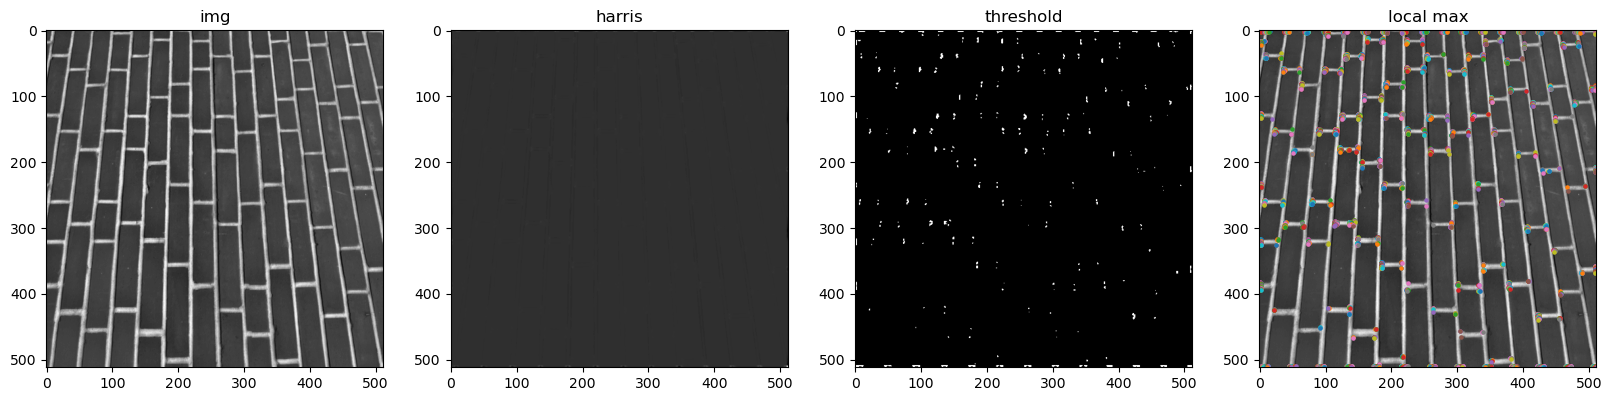

In [40]:
img = data.brick()
print(img.shape, img.min(), img.max())

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(img, cmap="gray"); plt.title('img')

harris = feature.corner_harris(img)

seuil = 0.01
threshold = harris > seuil

min_dist = 3
c1 = feature.peak_local_max(harris, labels=threshold, min_distance=min_dist)

m1 = np.zeros_like(img, dtype=bool)
m1[c1[:,0], c1[:,1]] = True

plt.subplot(142); plt.imshow(harris, cmap="gray"); plt.title('harris')
plt.subplot(143); plt.imshow(threshold, cmap="gray"); plt.title('threshold')
plt.subplot(144); plt.imshow(img, cmap="gray"); plt.title('local max')
yx = np.argwhere(threshold)
for y,x in yx:
    plt.scatter(x, y, s=5)

plt.show()

## Exercice 2
Appliquer un filtre détecteur de forme pour faire resortir les contours continus (lignes/tubes) dans l'image.

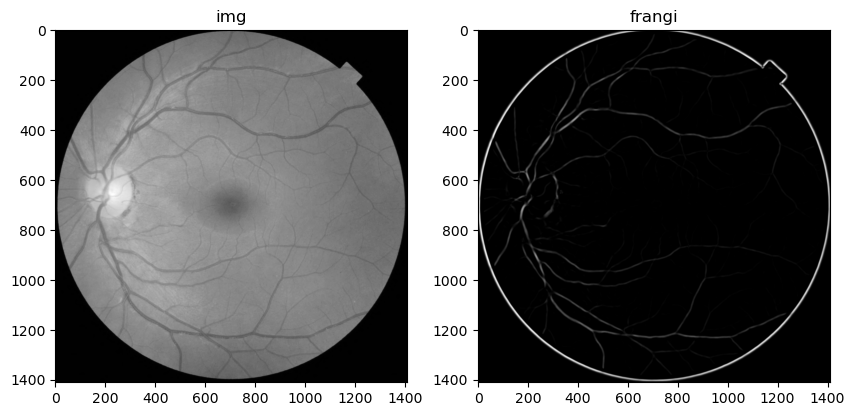

In [63]:
img = data.retina().mean(axis=2)
plt.figure(figsize=(10, 10))
plt.subplot(121); plt.imshow(img, cmap="gray"); plt.title("img")

frangi = filters.frangi(img, sigmas=(5,150))

plt.subplot(122); plt.imshow(frangi, cmap="gray"); plt.title("frangi")

plt.show()

## Exercice 3
Calculer le tenseur (H) pour `sub_img`.

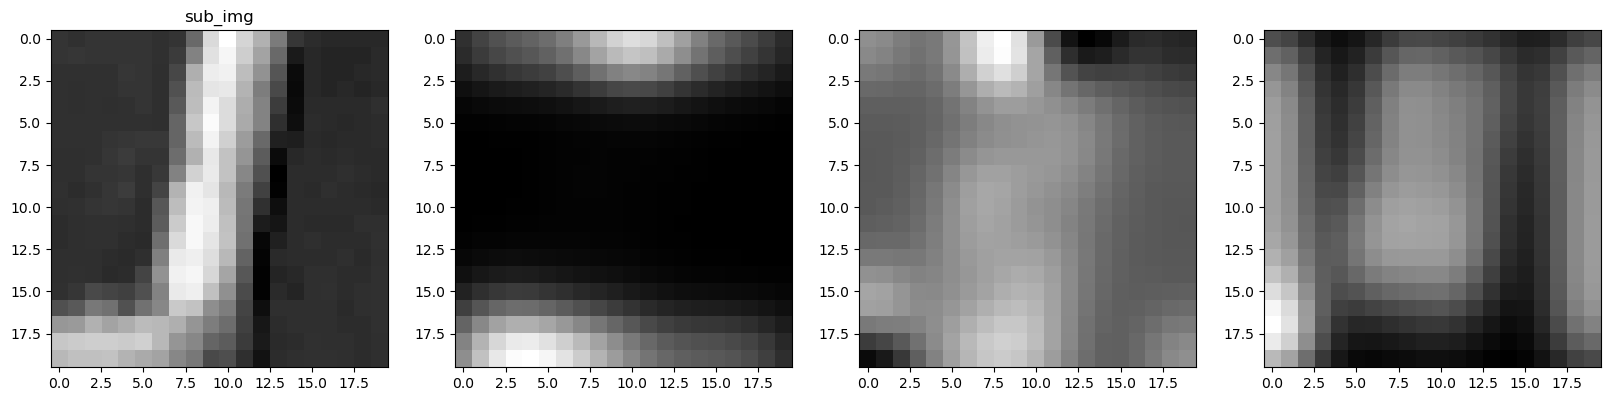

In [81]:
img = data.brick()
sub_img = img[:20, :20]

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(sub_img, cmap='gray'); plt.title('sub_img')

a, b, c = feature.structure_tensor(sub_img, sigma=2)

plt.subplot(142); plt.imshow(a, cmap='gray')
plt.subplot(143); plt.imshow(b, cmap='gray')
plt.subplot(144); plt.imshow(c, cmap='gray')

plt.show()